# 准备

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%pip install tqdm
from tqdm import tqdm
import math

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 目标函数

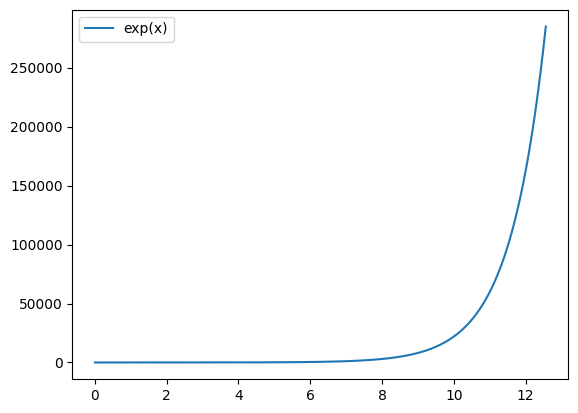

In [ ]:
def targetFunc(x):
    return np.exp(x) #目标函数为指数函数

x = np.arange(0, 4 * np.pi, 0.01)
plt.plot(x, [targetFunc(i) for i in x])
plt.legend(["exp(x)"])

## 数据采集

In [ ]:
x = np.arange(0, 2*np.pi, 0.0005) # 采集数据的步长
y = [targetFunc(i) for i in x]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 20%测试集，80%训练集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) # 10%验证集，训练集更新为70%

## 模型

In [ ]:
input_dim = 1 # 输入层
hidden_dim = 64 # 隐含层64个神经元
output_dim = 1 #输出层

W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1 / input_dim) # 输入层到隐藏层的权重
W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1 / hidden_dim) # 隐藏层到输出层的权重
b1 = np.zeros((hidden_dim, 1)) # 隐藏层的偏置
b2 = np.zeros((output_dim, 1)) # 输出层的偏置

cache = {}

def relu(X):
    return np.where(X > 0, X, 0) # ReLU函数


def forward(x):
    cache['out0'] = x
    x = np.matmul(W1, x) + b1 # 前向传播，线性计算
    cache['out1'] = x
    x = relu(x)
    cache['out2'] = x
    output = np.matmul(W2, x) + b2 # 前向传播，线性计算
    cache['out3'] = output
    return output


def loss_fn(y_pred, target):
    loss = np.sum((y_pred - target) * (y_pred - target), axis=1, keepdims=True) / len(y_pred)
    cache['loss'] = (y_pred - target) / len(y_pred)
    return loss # 使用均方误差（MSE）作为损失函数


def backward(lr, batch_size):
    global W1, W2, b1, b2
    
    # 计算输出层、隐含层的梯度
    delta2 = 1 / batch_size * cache['loss']
    dW2 = 1 / batch_size * np.matmul(delta2, cache['out2'].T)
    db2 = 1 / batch_size * np.sum(delta2, axis=1, keepdims=True)

    delta1 = np.matmul(W2.T, delta2) * np.where(cache['out1'] > 0, 1, 0)
    dW1 = 1 / batch_size * np.matmul(delta1, cache['out0'].T)
    db1 = 1 / batch_size * np.sum(delta1, axis=1, keepdims=True)

    # 参数更新
    W1 -= lr * dW1
    W2 -= lr * dW2
    b1 -= lr * db1
    b2 -= lr * db2

## 训练

In [73]:
def predict(ranger):
    x_plot = []
    y_pred = []
    for i in np.arange(ranger[0], ranger[1], 0.1):
        x = np.matmul(W1, np.array([[i]])) + b1
        x = relu(x)
        output = np.matmul(W2, x) + b2
        x_plot.append(i)
        y_pred.extend(output)

    plt.plot(x_plot, [targetFunc(i) for i in x_plot])
    plt.plot(x_plot, y_pred)
    plt.legend(["Ground truth", "Prediction"])


def train(X, y, epochs=5, batch_size=10, lr=0.001, verbose_ep=100):
    for epoch in tqdm(range(epochs)):
        rec_loss = 0
        for batch_idx in range(len(X) // batch_size):
            X_batched = np.array([X[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(X))]])
            y_batched = np.array([y[batch_idx * batch_size: min((batch_idx + 1) * batch_size, len(X))]])
            y_pred = forward(X_batched)
            loss = np.sum(loss_fn(y_pred,np.array(y_batched))) / len(y_pred)
            rec_loss += loss
            backward(lr, batch_size)
        if epoch % verbose_ep == 0:
            print(f"Epoch:{epoch}, Loss:{rec_loss / (len(X) // batch_size)}")

  0%|          | 7/5000 [00:00<01:19, 62.88it/s]

Epoch:0, Loss:207609.6359507


 20%|██        | 1015/5000 [00:13<00:50, 78.95it/s]

Epoch:1000, Loss:27.53269914611451


 40%|████      | 2009/5000 [00:26<00:39, 76.46it/s]

Epoch:2000, Loss:16.25327731568579


 60%|██████    | 3007/5000 [00:41<00:37, 52.66it/s]

Epoch:3000, Loss:14.709190070864897


 80%|████████  | 4005/5000 [00:59<00:19, 51.73it/s]

Epoch:4000, Loss:11.575854345801009


100%|██████████| 5000/5000 [01:17<00:00, 64.28it/s]


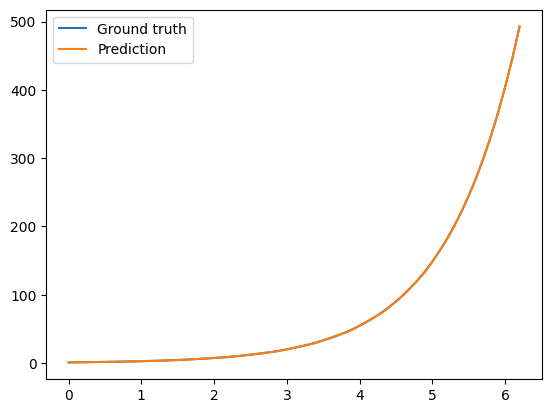

In [74]:
train(X_train, y_train, epochs=5000, batch_size=32, lr=0.01, verbose_ep=1000)
predict([0, 2 * np.pi])